In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt

In [2]:
import glob

In [3]:
import numpy as np
import os
import glob
import pickle
import math
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from numpy import array, dot, round, cross, ceil
from numpy.linalg import inv, det, norm
from numpy import cross, dot, ceil
from numpy.linalg import norm, inv

In [4]:
from csl_generator import getsigmas
from csl_generator import get_theta_m_n_list, degrees

In [5]:
from openpyxl import Workbook
from openpyxl.chart import Reference, LineChart
from openpyxl.chart.layout import Layout, ManualLayout
from openpyxl.chart.shapes import GraphicalProperties
from openpyxl.chart.shapes import GraphicalProperties
from openpyxl.drawing.line import LineProperties

In [6]:
def get_most_stable_gbenergy(filename):
    system_energy = np.loadtxt(f"{filename}")[:,-1]
    gbenergy = np.loadtxt(f"{filename}")[:,-2]
    most_stable_gbenergy = gbenergy[system_energy.argmin()]
    return most_stable_gbenergy

In [7]:
def make_excel(wb,ws,name,test_data,filename="gbenergy"):
    titles = [["angle","cnid_sampling","my_model","gbindice"]]
    test_data = titles + test_data

    for i,v in enumerate(test_data):
        ws.append(v)

    rmin = ws.min_row
    rmax = ws.max_row
    cmin = ws.min_column
    cmax = ws.max_column-1


    chart = LineChart()
    src = Reference(ws, min_col=cmin+1, min_row=rmin, max_col=cmax, max_row=rmax)
    chart.add_data(src, titles_from_data=True)
    cat = Reference(ws, min_col=cmin, min_row=rmin+1, max_row=rmax)  # 項目名の設定
    chart.set_categories(cat)
    first_name = "".join(list(name)[:-3])
    second_name = "".join(list(name)[-3:])
    chart.title = f"{first_name}[{second_name}]"  # グラフタイトル
    chart.x_axis.title = '傾角 [degree]'  # 軸ラベル
    chart.y_axis.title = r'粒界エネルギー [mJ/m^2]'
    chart.anchor = 'A8'  # グラフの表示位置
    chart.width = 13  # グラフのサイズ
    chart.height = 8


    chart.layout = Layout(ManualLayout(x = 0.05, y = 0.05, h = 0.9, w = 0.9, xMode="edge", yMode="edge"))
    #プロットエリアの
    chart.plot_area.spPr = GraphicalProperties(solidFill = "f2ffff", ln =LineProperties(solidFill="000000", w=2*12700))
    chart.plot_area.spPr = GraphicalProperties(noFill = True)

    ws.add_chart(chart)
    wb.save(f'{filename}.xlsx')

    # 線の色を変更する
    chart.ser[0].graphicalProperties.line.solidFill = "FF0000"
    chart.ser[1].graphicalProperties.line.solidFill = "00FF00"
    # chart.ser[2].graphicalProperties.line.solidFill = "0000FF"
    wb.save(f'{filename}.xlsx')

    # 線種を変更する
    # 設定可能な値：'lgDash', 'sysDash', 'dashDot', 'solid', 'sysDashDot',
    # 'lgDashDotDot', 'dot', 'sysDot', 'sysDashDotDot', 'dash', 'lgDashDot'
    chart.ser[0].graphicalProperties.line.dashStyle = 'solid'
    chart.ser[1].graphicalProperties.line.dashStyle = 'solid'
    # chart.ser[2].graphicalProperties.line.dashStyle = 'solid'
    wb.save(f'{filename}.xlsx')

    # 線の太さを変更する
    chart.ser[0].graphicalProperties.line.width = 10000
    chart.ser[1].graphicalProperties.line.width = 10000
    # chart.ser[2].graphicalProperties.line.width = 30000
    wb.save(f'{filename}.xlsx')

    # 線を滑らかにする
    chart.ser[0].smooth = False
    wb.save(f'{filename}.xlsx')

    # マーカーを変更する
    # 設定可能な値：'x', 'auto', 'picture', 'star', 'diamond', 'plus', 'dot',
    # 'square', 'dash', 'triangle', 'circle'
    chart.ser[0].marker.symbol = 'circle'
    chart.ser[1].marker.symbol = 'diamond'
    # chart.ser[2].marker.symbol = 'diamond'
    wb.save(f'{filename}.xlsx')

    chart.ser[0].marker.size = 10
    chart.ser[1].marker.size = 8
    # chart.ser[2].marker.symbol = 'diamond'
    wb.save(f'{filename}.xlsx')

    # マーカーの色を変更する
    chart.ser[0].marker.graphicalProperties.line.solidFill = "FF0000"
    chart.ser[1].marker.graphicalProperties.line.solidFill = "00FF00"
    # chart.ser[2].marker.graphicalProperties.line.solidFill = "0000FF"
    wb.save(f'{filename}.xlsx')

    # グラフの種類を変更する
    # chart.grouping = 'stacked'  # 積み上げ折れ線グラフ
    # chart.grouping = 'percentStacked'  # 100％積み上げ折れ線グラフ
    chart.grouping = 'standard'  # 折れ線グラフ
    wb.save(f'{filename}.xlsx')

In [8]:
def get_energy(filename):
    min_energy = get_most_stable_gbenergy(filename)
    return min_energy

In [9]:
def get_cnid_energy(filename):
    min_energy = get_most_stable_gbenergy(filename)
    return min_energy

In [10]:
def order_indice(test):
    test = np.array(test)
    test = np.sort(test)
    x, y, z = test
    if x!=y:
        test = np.array([z,y,x])
    else:
        pass
    return test

In [11]:
def get_100_gbenergy(dirname):
    misangle_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        gbname = filename_dash.split("_")
        gbname = gbname[:-1]
        gbname = list(map(float, gbname))
        tang = min([float(gbname[1])/float(gbname[0]),float(gbname[0])/float(gbname[1])])
        mis_angle = 2*(np.arctan(tang)/np.pi*180)
        gbe = get_energy(f"{filename}/results")
        mis_angle = np.round(mis_angle,5)
        gbe = np.round(gbe,5)
        misangle_list.append(mis_angle)
        gbe_list.append(gbe)
    result = np.array([misangle_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.vstack([np.array([0,0]),result_sorted,np.array([90,0])])
    return result_sorted

In [12]:
def get_100_cnid_gbenergy(dirname):
    misangle_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        gbname = filename_dash.split("_")
        gbname = gbname[:-1]
        gbname = list(map(float, gbname))
        tang = min([float(gbname[1])/float(gbname[0]),float(gbname[0])/float(gbname[1])])
        mis_angle = 2*(np.arctan(tang)/np.pi*180)
        gbe = get_cnid_energy(f"{filename}/results")
        mis_angle = np.round(mis_angle,5)
        gbe = np.round(gbe,5)
        misangle_list.append(mis_angle)
        gbe_list.append(gbe)
    result = np.array([misangle_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.vstack([np.array([0,0]),result_sorted,np.array([90,0])])
    return result_sorted

In [13]:
def get_110_gbenergy(dirname):
    misangle_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        gbname = filename_dash.split("_")
        gbname = gbname[:-1]
        gbname = list(map(float, gbname))
        gbname = order_indice(gbname)
        x, y, z = gbname
        tang = z/np.sqrt(x**2 + y**2)
        mis_angle = 2*(np.arctan(tang)/np.pi*180)
        mis_angle = abs(mis_angle)
        gbe = get_energy(f"{filename}/results")   
        mis_angle = np.round(mis_angle,5)
        gbe = np.round(gbe,5)
        misangle_list.append(mis_angle)
        gbe_list.append(gbe)
    result = np.array([misangle_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.vstack([np.array([0,0]),result_sorted,np.array([180,0])])
    return result_sorted

In [14]:
def get_110_cnid_gbenergy(dirname):
    misangle_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        gbname = filename_dash.split("_")
        gbname = gbname[:-1]
        gbname = list(map(float, gbname))
        gbname = order_indice(gbname)
        x, y, z = gbname
        tang = z/np.sqrt(x**2 + y**2)
        mis_angle = 2*(np.arctan(tang)/np.pi*180)
        mis_angle = abs(mis_angle)
        gbe = get_cnid_energy(f"{filename}/results")
        mis_angle = np.round(mis_angle,5)
        gbe = np.round(gbe,5)
        misangle_list.append(mis_angle)
        gbe_list.append(gbe)
    result = np.array([misangle_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.vstack([np.array([0,0]),result_sorted,np.array([180,0])])
    return result_sorted

In [15]:
def get_111_gbenergy(dirname):
    misangle_list = []
    gbe_list = []
    baselist = []
    for i in list(itertools.permutations([1,-1,0])):
        baselist.append(list(i))
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        gbname = filename_dash.split("_")
        gbname = gbname[:-1]
        gbname = list(map(float, gbname))
        gbname = [-gbname[0],gbname[1],gbname[2]]
        misorientation_list = []
        for base in baselist:
            cos = dot(gbname,base)/(norm(gbname)*norm(base))
            mis_orientation = 2*(np.arccos(cos)/np.pi*180)
            mis_orientation =  abs(mis_orientation)
            misorientation_list.append(mis_orientation)
        mis_angle = min(misorientation_list)
        gbe = get_energy(f"{filename}/results") 
        mis_angle = np.round(mis_angle,5)
        gbe = np.round(gbe,5)
        misangle_list.append(mis_angle)
        gbe_list.append(gbe)
    result = np.array([misangle_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.vstack([np.array([0,0]),result_sorted])
    return result_sorted

In [16]:
def get_111_cnid_gbenergy(dirname):
    misangle_list = []
    gbe_list = []
    baselist = []
    for i in list(itertools.permutations([1,-1,0])):
        baselist.append(list(i))
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        gbname = filename_dash.split("_")
        gbname = gbname[:-1]
        gbname = list(map(float, gbname))
        gbname = [-gbname[0],gbname[1],gbname[2]]
        misorientation_list = []
        for base in baselist:
            cos = dot(gbname,base)/(norm(gbname)*norm(base))
            mis_orientation = 2*(np.arccos(cos)/np.pi*180)
            mis_orientation =  abs(mis_orientation)
            misorientation_list.append(mis_orientation)
        mis_angle = min(misorientation_list)
        gbe = get_cnid_energy(f"{filename}/results")
        mis_angle = np.round(mis_angle,5)
        gbe = np.round(gbe,5)
        misangle_list.append(mis_angle)
        gbe_list.append(gbe)
    result = np.array([misangle_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.vstack([np.array([0,0]),result_sorted])
    return result_sorted

In [17]:
def get_100_gbindice(dirname):
    misangle_list = []
    gbindice_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        gbname = filename_dash.split("_")
        gbname = gbname[:-1]
        gbname = list(map(float, gbname))
        tang = min([float(gbname[1])/float(gbname[0]),float(gbname[0])/float(gbname[1])])
        mis_angle = 2*(np.arctan(tang)/np.pi*180)
        mis_angle = np.round(mis_angle,5)
        misangle_list.append(mis_angle)
        gbindice_list.append(f"{int(gbname[0])} {int(gbname[1])} {int(gbname[2])}")
        
    misangle_list = np.array(misangle_list)
    gbindice_list = np.array(gbindice_list)
    gbindice_list_sorted = gbindice_list[np.argsort(misangle_list)]
    gbindice_list_sorted = np.hstack([np.array(["1 0 0"]),gbindice_list_sorted,np.array(["1 1 0"])])
    return gbindice_list_sorted

In [18]:
def get_110_gbindice(dirname):
    misangle_list = []
    gbindice_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        gbname = filename_dash.split("_")
        gbname = gbname[:-1]
        gbname = list(map(float, gbname))
        gbname = order_indice(gbname)
        x, y, z = gbname
        tang = z/np.sqrt(x**2 + y**2)
        mis_angle = 2*(np.arctan(tang)/np.pi*180)
        mis_angle = abs(mis_angle) 
        mis_angle = np.round(mis_angle,5)
        misangle_list.append(mis_angle)
        gbindice_list.append(f"{int(gbname[0])} {int(gbname[1])} {int(gbname[2])}")
        
    misangle_list = np.array(misangle_list)
    gbindice_list = np.array(gbindice_list)
    gbindice_list_sorted = gbindice_list[np.argsort(misangle_list)]
    gbindice_list_sorted = np.hstack([np.array(["1 1 0"]),gbindice_list_sorted,np.array(["1 0 0"])])
        
    return gbindice_list_sorted

In [19]:
def get_111_gbindice(dirname):
    misangle_list = []
    gbindice_list = []
    baselist = []
    for i in list(itertools.permutations([1,-1,0])):
        baselist.append(list(i))
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        gbname = filename_dash.split("_")
        gbname = gbname[:-1]
        gbname = list(map(float, gbname))
        gbname = [-gbname[0],gbname[1],gbname[2]]
        misorientation_list = []
        for base in baselist:
            cos = dot(gbname,base)/(norm(gbname)*norm(base))
            mis_orientation = 2*(np.arccos(cos)/np.pi*180)
            mis_orientation =  abs(mis_orientation)
            misorientation_list.append(mis_orientation)
        mis_angle = min(misorientation_list)
        mis_angle = np.round(mis_angle,5)
        misangle_list.append(mis_angle)
        gbindice_list.append(f"{int(gbname[0])} {int(gbname[1])} {int(gbname[2])}")
        
    misangle_list = np.array(misangle_list)
    gbindice_list = np.array(gbindice_list)
    gbindice_list_sorted = gbindice_list[np.argsort(misangle_list)]
    gbindice_list_sorted = np.hstack([np.array(["1 1 0"]),gbindice_list_sorted])
    
    return gbindice_list_sorted

In [20]:
def make_results_excel(results,results2,filename="gbenergy"):
    wb = Workbook()

    for i,dirname in enumerate(glob.glob(f"{results}/*")):
        print(dirname)
        name = dirname.split("/")[-1]
        name_dash = name.split("_")[0]
        axis = "".join(list(name_dash)[-3:])
        print(name)
        print(axis)
        if i == 0:
            ws = wb.active
            ws.title = f"{name}"

        else:
            ws = wb.create_sheet(title = f"{name}")


        if axis=="100":
            result_sorted = get_100_gbenergy(dirname)
            result_sorted_cnid = get_100_cnid_gbenergy(f"{results2}/{name}")
            result_tot = np.hstack([result_sorted_cnid,result_sorted[:,1].reshape(-1,1),]).tolist()
            gbindice_list = get_100_gbindice(dirname)
            result_tot_gbindice = [result+[gbindice] for result,gbindice in zip(result_tot,gbindice_list)]
            make_excel(wb,ws,name_dash,result_tot_gbindice,filename)

        elif axis=="110":
            result_sorted = get_110_gbenergy(dirname)
            result_sorted_cnid = get_110_cnid_gbenergy(f"{results2}/{name}")
            result_tot = np.hstack([result_sorted_cnid,result_sorted[:,1].reshape(-1,1),]).tolist()
            gbindice_list = get_110_gbindice(dirname)
            result_tot_gbindice = [result+[gbindice] for result,gbindice in zip(result_tot,gbindice_list)]
            make_excel(wb,ws,name_dash,result_tot_gbindice,filename)


        else:
            result_sorted = get_111_gbenergy(dirname)
            result_sorted_cnid = get_111_cnid_gbenergy(f"{results2}/{name}")
            result_tot = np.hstack([result_sorted_cnid,result_sorted[:,1].reshape(-1,1),]).tolist()
            gbindice_list = get_111_gbindice(dirname)
            result_tot_gbindice = [result+[gbindice] for result,gbindice in zip(result_tot,gbindice_list)]
            make_excel(wb,ws,name_dash,result_tot_gbindice,filename)

In [ ]:
def get_100_sigma():
    sigmas, angles = getsigmas([1,0,0],100)
        
    angles = np.array(angles)
    sigmas = np.array(sigmas)
    sigmas_sorted = sigmas[np.argsort(angles)]
    sigmas_sorted = np.hstack([np.array(["1"]),sigmas_sorted,np.array(["1"])])
    return sigmas_sorted

In [ ]:
def get_110_sigma():
    sigmas, angles = getsigmas([1,1,0],100)
        
    angles = np.array(angles)
    sigmas = np.array(sigmas)
    sigmas_sorted = sigmas[np.argsort(angles)]
    sigmas_sorted = np.hstack([np.array(["1"]),sigmas_sorted,np.array(["1"])])
    return sigmas_sorted

In [ ]:
def getsigmas(uvw, limit):
    """
    ---by Haddian---
    prints a list of smallest sigmas/angles for a given axis(uvw).
    """
    sigmas = []
    thetas = []
    for i in range(limit):

        tt = get_theta_m_n_list(uvw, i)
        if len(tt) > 0 and i > 1:
            theta, m, n = tt[0]
            sigmas.append(i)
            thetas.append(degrees(theta))                
    return sigmas, thetas

In [ ]:
def get_111_sigma():
    sigmas, angles = getsigmas([1,1,1],100)
        
    angles = np.array(angles)
    sigmas = np.array(sigmas)
    sigmas_sorted = sigmas[np.argsort(angles)]
    sigmas_sorted = np.hstack([np.array(["1"]),sigmas_sorted])
    return sigmas_sorted

In [ ]:
def get_100_twist_gbenergy(dirname):
    sigma_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        sigma = int(filename_dash.split("_")[0])
        gbe = get_energy(f"{filename}/results")
        sigma_list.append(sigma)
        gbe_list.append(gbe)
    result = np.array([sigma_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.hstack((np.array(getsigmas([1,0,0],100))[1].reshape(-1,1),result_sorted[:,1].reshape(-1,1)))
    result_sorted = np.vstack([np.array([0,0]),result_sorted,np.array([45,0])])
    result_sorted = result_sorted[np.argsort(result_sorted[:, col_num])]
    return result_sorted

In [ ]:
def get_110_twist_gbenergy(dirname):
    sigma_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        sigma = int(filename_dash.split("_")[0])
        gbe = get_energy(f"{filename}/results")
        sigma_list.append(sigma)
        gbe_list.append(gbe)
    result = np.array([sigma_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.hstack((np.array(getsigmas([1,1,0],100))[1].reshape(-1,1),result_sorted[:,1].reshape(-1,1)))
    result_sorted = np.vstack([np.array([0,0]),result_sorted,np.array([90,0])])
    result_sorted = result_sorted[np.argsort(result_sorted[:, col_num])]
    return result_sorted

In [ ]:
def get_111_twist_gbenergy(dirname):
    sigma_list = []
    gbe_list = []
    for filename in glob.glob(f"{dirname}/*gb"):
        filename_dash = filename.split("/")[-1]
        sigma = int(filename_dash.split("_")[0])
        gbe = get_energy(f"{filename}/results")
        sigma_list.append(sigma)
        gbe_list.append(gbe)
    result = np.array([sigma_list,gbe_list]).T
    col_num = 0
    result_sorted = result[np.argsort(result[:, col_num])]
    result_sorted = np.hstack((np.array(getsigmas([1,1,1],100))[1].reshape(-1,1),result_sorted[:,1].reshape(-1,1)))
    result_sorted = np.vstack([np.array([0,0]),result_sorted])
    result_sorted = result_sorted[np.argsort(result_sorted[:, col_num])]
    return result_sorted

In [ ]:
def make_results_excel_for_twist(results,results2,filename="gbenergy"):
    wb = Workbook()

    for i,dirname in enumerate(glob.glob(f"{results}/*")):
        print(dirname)
        name = dirname.split("/")[-1]
        name_dash = name.split("_")[0]
        axis = "".join(list(name_dash)[-3:])
        print(name)
        print(axis)
        if i == 0:
            ws = wb.active
            ws.title = f"{name}"

        else:
            ws = wb.create_sheet(title = f"{name}")


        if axis=="100":
            result_sorted = get_100_twist_gbenergy(dirname)
            result_sorted_cnid = get_100_twist_gbenergy(f"{results2}/{name}")
            result_tot = np.hstack([result_sorted_cnid,result_sorted[:,1].reshape(-1,1),]).tolist()
            gbindice_list = get_100_sigma()
            result_tot_gbindice = [result+[gbindice] for result,gbindice in zip(result_tot,gbindice_list)]
            make_excel(wb,ws,name_dash,result_tot_gbindice,filename)

        elif axis=="110":
            result_sorted = get_110_twist_gbenergy(dirname)
            result_sorted_cnid = get_110_twist_gbenergy(f"{results2}/{name}")
            result_tot = np.hstack([result_sorted_cnid,result_sorted[:,1].reshape(-1,1),]).tolist()
            gbindice_list = get_110_sigma()
            result_tot_gbindice = [result+[gbindice] for result,gbindice in zip(result_tot,gbindice_list)]
            make_excel(wb,ws,name_dash,result_tot_gbindice,filename)

        else:
            result_sorted = get_111_twist_gbenergy(dirname)
            result_sorted_cnid = get_111_twist_gbenergy(f"{results2}/{name}")
            result_tot = np.hstack([result_sorted_cnid,result_sorted[:,1].reshape(-1,1),]).tolist()
            gbindice_list = get_111_sigma()
            result_tot_gbindice = [result+[gbindice] for result,gbindice in zip(result_tot,gbindice_list)]
            make_excel(wb,ws,name_dash,result_tot_gbindice,filename)

In [ ]:
make_results_excel_for_twist("change_termination","cnid",filename="twist")

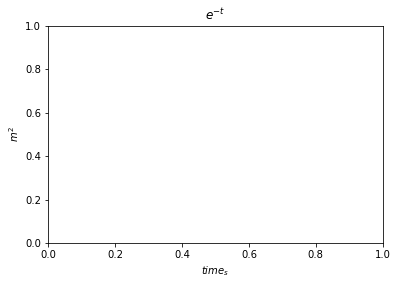

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set(title=r'$e^{-t}$',
       xlabel=r'$time_s$', ylabel=r'$m^2$')
plt.show()